In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


1. Take a bunch of board pictures with different piece configurations
2. Take squares out of the images and save them into folders of different categories - e.g. black, blue, red, etc...
3. Take a subset of these and put them into a test folder, the rest in a train folder
4. Try out the classfiers on the training example - testing on the test set  - do they work?
5. Now that you know it works, then try it from the beginning
    1. loading a big image, slicing into squares
    2. using the trained classifier to predict the new squares
    3. convert the result to a Game simulator board

## Take a bunch of board pictures with different piece configurations

In [2]:
board_size=(4,4)

In [3]:
def list_files(startpath,ignore=[]):
    import os

    
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            if f in ignore:
                continue
            
            print('{}{}'.format(subindent, f))

In [26]:
def read_image(fname):
    arr=imread(fname)
    print("Min and Max",arr.min(),arr.max())    
    
    if any(arr>1):  # if the image is read in as uint8, it's not 0-1 but 0-255, so scale it down
        print("Min and Max",arr.min(),arr.max())
        print("Scaling it down....")
        arr=arr/255
        print("Min and Max",arr.min(),arr.max())    
        
    if len(arr.shape)>2 and arr.shape[2]>3:  # alpha channel
        print("arr shape",arr.shape)
        print("Removing alpha channel")
        arr=arr[:,:,:3]
        print("new arr shape",arr.shape)
        
        
    arr=arr[30:260,45:310]  # change this for your image
    
    return arr

In [27]:
def get_square(arr,Nr,Nc,r,c,percent=100):
    image_rows,image_cols=arr.shape[:2]
    square_row=int(image_rows/Nr)
    square_col=int(image_cols/Nc)
    
    start_row=int(r*square_row)
    end_row=int((r+1)*square_row)

    start_col=int(c*square_col)
    end_col=int((c+1)*square_col)
    
    if percent==100:
        square=arr[start_row:end_row,start_col:end_col]
        
    else:
        dc=int((end_col-start_col)*(100-percent)/2.0/100.0)
        dr=int((end_row-start_row)*(100-percent)/2.0/100.0)

        square=arr[start_row+dr:end_row-dr,start_col+dc:end_col-dc]
        
        
    return square

Min and Max 5 236
Min and Max 5 236
Scaling it down....
Min and Max 0.0196078431372549 0.9254901960784314


Text(0.5,1,'Image Size: 230,265')

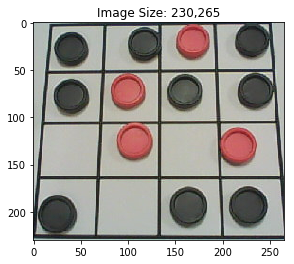

In [28]:
fname='robot images/test9.jpg'
count=1
arr=read_image(fname)
imshow(arr)
title('Image Size: %d,%d' % (arr.shape[0],arr.shape[1]))

## Take squares out of the images and save them into folders of different categories - e.g. black, blue, red, etc...

I find that trimming by 50% or so gives better performance.

In [36]:
percent_trim=100

### WARNING - looks like you want to save your data as png otherwise the size of the vectors can change ####

In [37]:
from pylab import imsave,imread,rand
arr=(rand(57,66,3)*255).astype('uint8')

print("Original Shape: ",arr.shape)
imsave('test.jpg',arr)
imsave('test.png',arr)

arr=imread('test.png')
print("PNG Shape: ",arr.shape)

arr=imread('test.jpg')
print("JPG Shape: ",arr.shape)


Original Shape:  (57, 66, 3)
PNG Shape:  (57, 66, 4)
JPG Shape:  (56, 66, 3)


In [38]:
from pylab import imsave,imread,rand
from imageio import imwrite as imsave

arr=(rand(57,66,3)*255).astype('uint8')

print("Original Shape: ",arr.shape)
imsave('test.jpg',arr)
imsave('test.png',arr)

arr=imread('test.png')
print("PNG Shape: ",arr.shape)

arr=imread('test.jpg')
print("JPG Shape: ",arr.shape)


Original Shape:  (57, 66, 3)
PNG Shape:  (57, 66, 3)
JPG Shape:  (57, 66, 3)


In [39]:
from PIL import Image
arr=rand(57,66,3)
arr=(arr*255).astype('uint8')

im = Image.fromarray(arr)
im.save("test.jpg")
im.save("test.png")


arr=imread('test.png')
print(arr.shape)

arr=imread('test.jpg')
print(arr.shape)

(57, 66, 3)
(57, 66, 3)


Min and Max 5 236
Min and Max 5 236
Scaling it down....
Min and Max 0.0196078431372549 0.9254901960784314
saving  piece0.png shape  (57, 66, 3)
saving  piece1.png shape  (57, 66, 3)
saving  piece2.png shape  (57, 66, 3)
saving  piece3.png shape  (57, 66, 3)
saving  piece4.png shape  (57, 66, 3)
saving  piece5.png shape  (57, 66, 3)
saving  piece6.png shape  (57, 66, 3)
saving  piece7.png shape  (57, 66, 3)
saving  piece8.png shape  (57, 66, 3)
saving  piece9.png shape  (57, 66, 3)
saving  piece10.png shape  (57, 66, 3)
saving  piece11.png shape  (57, 66, 3)
saving  piece12.png shape  (57, 66, 3)
saving  piece13.png shape  (57, 66, 3)
saving  piece14.png shape  (57, 66, 3)
saving  piece15.png shape  (57, 66, 3)


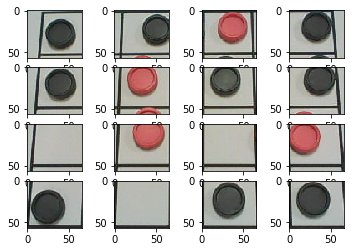

In [40]:
from pylab import imsave
fname='robot images/test9.jpg'
count=0
arr=read_image(fname)
for r in range(4):
    for c in range(4):
        subplot(4,4,count+1)
        small_square=get_square(arr,board_size[0],board_size[1],r,c,percent_trim)
        
        imshow(small_square)
        
        sfname='piece%d.png' % count
        imsave(sfname,small_square)
        print("saving ",sfname, "shape ",small_square.shape)
        count+=1

### want to do more than one image?  ...and include flipped images?

In [41]:
filenames=['robot images/test0.jpg',
           'robot images/test1.jpg',
           'robot images/test2.jpg',
           'robot images/test4.jpg',
           'robot images/test5.jpg',
           'robot images/test6.jpg',
           'robot images/test7.jpg',
           'robot images/test10.jpg',
          ]
count=0
for fname in filenames:
    arr=read_image(fname)
    for r in range(4):
        for c in range(4):
            #subplot(4,4,count+1)
            small_square=get_square(arr,board_size[0],board_size[1],r,c,percent_trim)
            #imshow(small_square)
            
            
            # original
            for transform in ['original','flipud','fliplr','fliplrud']:
                sfname='piece%d.png' % count
                
                if transform=='original':                
                    save_square=small_square
                elif transform=='flipud':
                    save_square=flipud(small_square)
                elif transform=='fliplr':
                    save_square=fliplr(small_square)
                elif transform=='fliplrud':
                    save_square=fliplr(flipud(small_square))
                else:
                    raise ValueError("Not implemented")
                    
                imsave(sfname,save_square)                    
                print("saving ",sfname, "shape ",save_square.shape)
                count+=1
            
            
            
            
            
square_shape=small_square.shape

Min and Max 2 230
Min and Max 2 230
Scaling it down....
Min and Max 0.00784313725490196 0.9019607843137255
saving  piece0.png shape  (57, 66, 3)
saving  piece1.png shape  (57, 66, 3)
saving  piece2.png shape  (57, 66, 3)
saving  piece3.png shape  (57, 66, 3)
saving  piece4.png shape  (57, 66, 3)
saving  piece5.png shape  (57, 66, 3)
saving  piece6.png shape  (57, 66, 3)
saving  piece7.png shape  (57, 66, 3)
saving  piece8.png shape  (57, 66, 3)
saving  piece9.png shape  (57, 66, 3)
saving  piece10.png shape  (57, 66, 3)
saving  piece11.png shape  (57, 66, 3)
saving  piece12.png shape  (57, 66, 3)
saving  piece13.png shape  (57, 66, 3)
saving  piece14.png shape  (57, 66, 3)
saving  piece15.png shape  (57, 66, 3)
saving  piece16.png shape  (57, 66, 3)
saving  piece17.png shape  (57, 66, 3)
saving  piece18.png shape  (57, 66, 3)
saving  piece19.png shape  (57, 66, 3)
saving  piece20.png shape  (57, 66, 3)
saving  piece21.png shape  (57, 66, 3)
saving  piece22.png shape  (57, 66, 3)
saving

# Take a subset of these and put them into a test folder, the rest in a train folder

Notice that none of the images in the test set are also in the training set.

In [43]:
from glob import glob
print(glob("train_pieces/*"))
print(glob("train_pieces/black/*"))

['train_pieces/black', 'train_pieces/red', 'train_pieces/white']
['train_pieces/black/piece100.png', 'train_pieces/black/piece101.png', 'train_pieces/black/piece102.png', 'train_pieces/black/piece103.png', 'train_pieces/black/piece104.png', 'train_pieces/black/piece105.png', 'train_pieces/black/piece106.png', 'train_pieces/black/piece107.png', 'train_pieces/black/piece108.png', 'train_pieces/black/piece109.png', 'train_pieces/black/piece110.png', 'train_pieces/black/piece111.png', 'train_pieces/black/piece77.png', 'train_pieces/black/piece78.png', 'train_pieces/black/piece79.png', 'train_pieces/black/piece80.png', 'train_pieces/black/piece81.png', 'train_pieces/black/piece82.png', 'train_pieces/black/piece83.png', 'train_pieces/black/piece84.png', 'train_pieces/black/piece85.png', 'train_pieces/black/piece86.png', 'train_pieces/black/piece87.png', 'train_pieces/black/piece88.png', 'train_pieces/black/piece89.png', 'train_pieces/black/piece90.png', 'train_pieces/black/piece91.png', 'tra

### want to split them automatically?

Put them in the folders, and then choose a random subset

In [44]:
from classy import *
images_all=image.load_images('all_pieces')
print(glob("all_pieces/*"))

[black]: 192 files found
[red]: 192 files found
[white]: 128 files found
['all_pieces/black', 'all_pieces/red', 'all_pieces/white']


In [63]:
images_train,images_test=image.split(images_all)

Files in Test Set:
	 all_pieces/black/piece399.png,all_pieces/black/piece343.png,all_pieces/black/piece348.png,all_pieces/black/piece278.png,all_pieces/black/piece392.png,all_pieces/black/piece289.png,all_pieces/black/piece397.png,all_pieces/black/piece444.png,all_pieces/black/piece307.png,all_pieces/black/piece275.png,all_pieces/black/piece435.png,all_pieces/black/piece360.png,all_pieces/black/piece331.png,all_pieces/black/piece357.png,all_pieces/black/piece419.png,all_pieces/black/piece402.png,all_pieces/black/piece326.png,all_pieces/black/piece329.png,all_pieces/black/piece372.png,all_pieces/black/piece432.png,all_pieces/black/piece340.png,all_pieces/black/piece362.png,all_pieces/black/piece427.png,all_pieces/black/piece309.png,all_pieces/black/piece274.png,all_pieces/black/piece424.png,all_pieces/black/piece441.png,all_pieces/black/piece287.png,all_pieces/black/piece438.png,all_pieces/black/piece316.png,all_pieces/black/piece422.png,all_pieces/black/piece310.png,all_pieces/black/pi

# Try out the classfiers on the training example - testing on the test set  - do they work?

In [64]:
from classy import *

In [65]:
#images_train=image.load_images('train_pieces')
summary(images_train)

#images_test=image.load_images('test_pieces')
summary(images_test)


Images
104 images of shape (57, 66, 3)
Target values given.
Target names: 'black', 'red', 'white'
Images
408 images of shape (57, 66, 3)
Target values given.
Target names: 'black', 'red', 'white'


In [66]:
images_train.data[0].shape

(57, 66, 3)

In [67]:
data_train=image.images_to_vectors(images_train)
if any(data_train.vectors>1):
    print("\nScaling down...")
    data_train.vectors/=255.0
    summary(data_train)
    
print("=====================")

data_test=image.images_to_vectors(images_test)
if any(data_test.vectors>1):
    print("\nScaling down...")
    data_test.vectors/=255.0
    summary(data_train)
summary(data_test)
    
    
    
data_train,data_test=remap_targets(data_train,data_test,
            ['white','red','black'])  # make sure the targets match


104 vectors of length 11286
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p11281', 'p11282', 'p11283', 'p11284', 'p11285'  (11286 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [136.125      143.25961538 136.70192308 ... 131.68269231 139.52884615
 133.68269231]
Median:  [179.  186.  178.  ... 177.  184.5 176.5]
Stddev:  [65.52211716 65.27338885 63.77814308 ... 67.78036708 67.79933014
 65.05770581]

Scaling down...
104 vectors of length 11286
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p11281', 'p11282', 'p11283', 'p11284', 'p11285'  (11286 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.53382353 0.56180241 0.53608597 ... 0.51640271 0.54717195 0.52424585]
Median:  [0.70196078 0.72941176 0.69803922 ... 0.69411765 0.72352941 0.69215686]
Stddev:  [0.25694948 0.25597407 0.25011037 ... 0.26580536 0.26587973 0.25512826]
408 vectors of length 11286
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p11281', 'p1

In [68]:
C=NaiveBayes()
# or...
#C=kNearestNeighbor()
#C=CSC()

In [69]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.015259742736816406 seconds ')


In [70]:
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Test Set: 96.56862745098039


In [71]:
wrong=where(np.logical_not(C.predict(data_test.vectors)==data_test.targets))[0]

Text(0.5,1,'red')

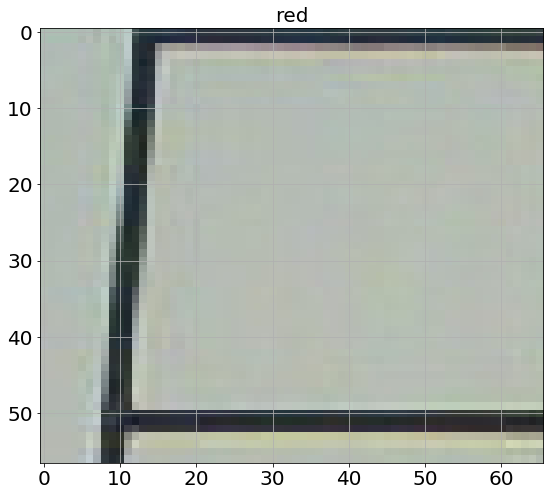

In [72]:
vec=data_test.vectors[wrong[0]]
image.vector_to_image(vec,square_shape)

prediction=data_test.target_names[C.predict(atleast_2d(vec))[0]]

title(prediction)

In [73]:
C.predict_proba(atleast_2d(vec))

array([[0., 1., 0.]])

In [74]:
data_train.target_names

['white', 'red', 'black']

### What do the prototypes look like?

In [66]:
C.means.shape

(3, 11286)

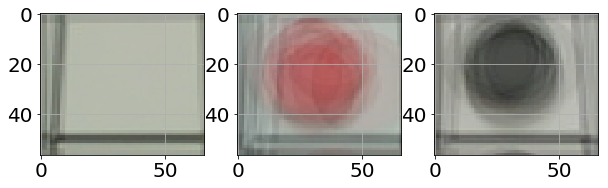

In [67]:
square_shape=images_train.data[0].shape
subplot(1,3,1)
im=image.vector_to_image(C.means[0],square_shape)

subplot(1,3,2)
im=image.vector_to_image(C.means[1],square_shape)

subplot(1,3,3)
im=image.vector_to_image(C.means[2],square_shape)


## Now that you know it works, then try it from the beginning

### training with all of the examples

In [65]:
images_all=image.load_images('all_pieces')
summary(images_all)

[black]: 48 files found
[red]: 48 files found
[white]: 32 files found
Images
128 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'


In [66]:
data_train=image.images_to_vectors(images_train)
if any(data_train.vectors>1):
    print("\nScaling down...")
    data_train.vectors/=255.0
    summary(data_train)

27 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [154.25925926 136.62962963 133.11111111 ... 165.48148148 164.96296296
 158.18518519]
Median:  [173. 170. 164. ... 181. 187. 178.]
Stddev:  [44.88222662 56.17377017 53.28354157 ... 38.55479061 48.33255285
 46.37930336]

Scaling down...
27 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.60493827 0.53580247 0.52200436 ... 0.64894699 0.64691358 0.62033406]
Median:  [0.67843137 0.66666667 0.64313725 ... 0.70980392 0.73333333 0.69803922]
Stddev:  [0.17600873 0.22028929 0.20895506 ... 0.15119526 0.18953942 0.18187962]


In [67]:
C=NaiveBayes()
C.fit(data_train.vectors,data_train.targets)

### loading a big image, slicing into squares

In [68]:
from classy.image import array_to_image_struct

Min and Max 5 236
Min and Max 5 236
Scaling it down....
Min and Max 0.0196078431372549 0.9254901960784314
16 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'
Mean:  [0.55906863 0.53333333 0.51176471 ... 0.67328431 0.67892157 0.65171569]
Median:  [0.69019608 0.66666667 0.65098039 ... 0.73333333 0.7372549  0.70980392]
Stddev:  [0.21254381 0.20976269 0.2076303  ... 0.15108679 0.16394476 0.16307089]


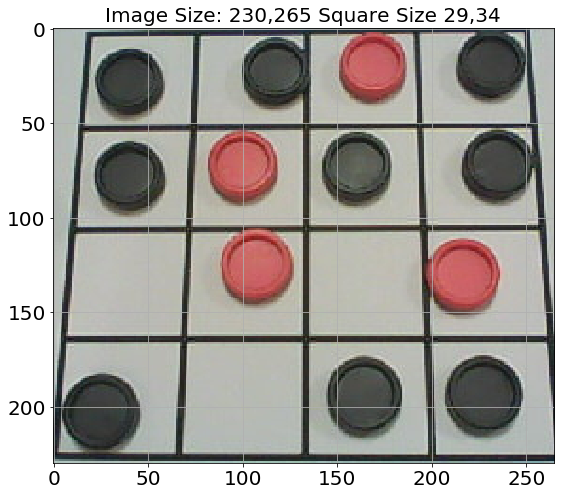

In [69]:
fname='robot images/test9.jpg'
count=1
arr=read_image(fname)
imshow(arr)
squares=[]
for r in range(4):
    for c in range(4):
        square=get_square(arr,board_size[0],board_size[1],r,c)
        
        small_square=get_square(arr,board_size[0],board_size[1],r,c,percent_trim)
        
        squares.append(small_square)
        count+=1
    
title('Image Size: %d,%d Square Size %d,%d' % (arr.shape[0],arr.shape[1],
                                         small_square.shape[0],
                                         small_square.shape[1],
                                         ))

square_images=array_to_image_struct(squares)
square_data=image.images_to_vectors(square_images)


In [77]:
from Game import *

state=Board(4,4)
state.board=C.predict(square_data.vectors)
print(state)
imshow(arr)

Version:  0.2.10


NameError: name 'square_data' is not defined